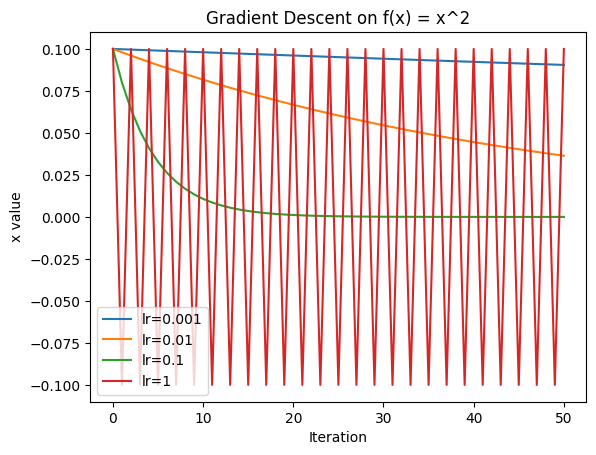

In [ ]:
# Convex Function: 

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x ** 2

def grad_f1(x):
    return 2 * x

def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

start_point = 0.1  
learning_rates = [0.001, 0.01, 0.1, 1] 
num_iterations = 50  

for lr in learning_rates:
    x_history = gradient_descent(grad_f1, start_point, lr, num_iterations)
    plt.plot(x_history, label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = x^2')
plt.legend()
plt.show()

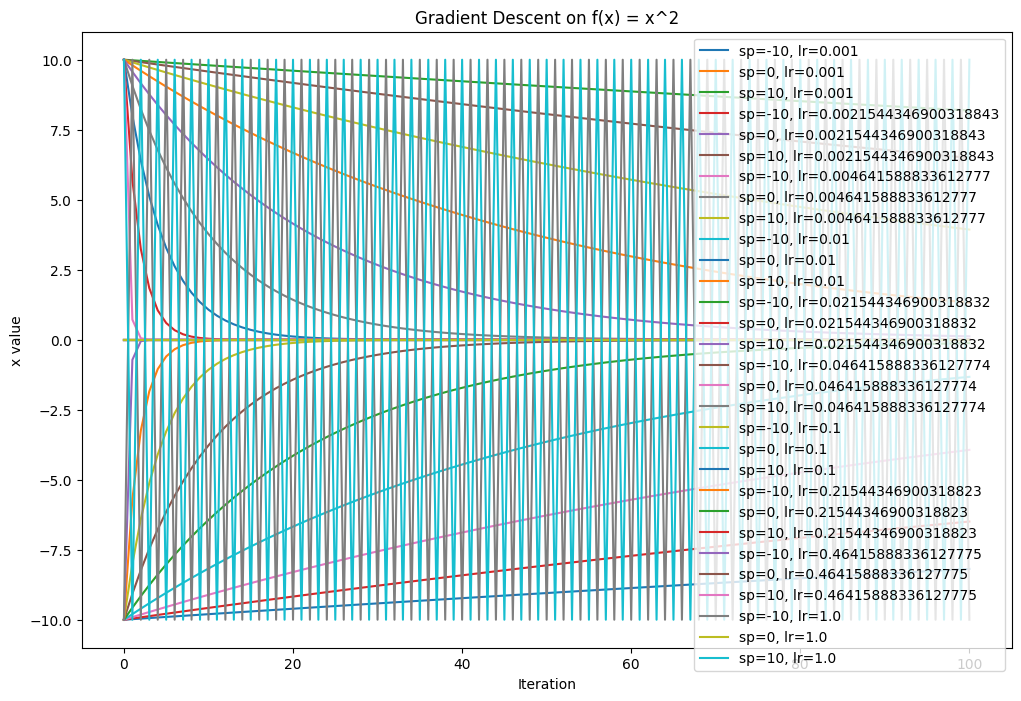

In [ ]:
# Convex Function: more data points
start_points = [-10, 0, 10]  
learning_rates = np.logspace(-3, 0, num=10)  
num_iterations = 100  

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f1, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = x^2')
plt.legend()
plt.show()

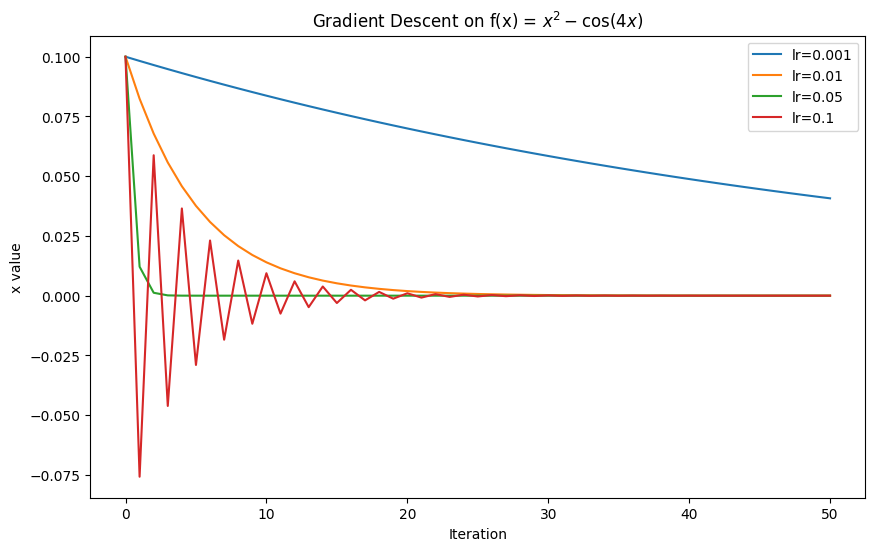

In [71]:
# Non-convex Function

# Define the non-convex function f(x) = x^2 - cos(6x)
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_point = 0.1  # Initial point
learning_rates = [0.001, 0.01, 0.05, 0.1]  # Different learning rates
num_iterations = 50  # Number of iterations

# Run gradient descent for each learning rate and plot the results
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    x_history = gradient_descent(grad_f_nonconvex, start_point, lr, num_iterations)
    plt.plot(x_history, label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(4x)$')
plt.legend()
plt.show()

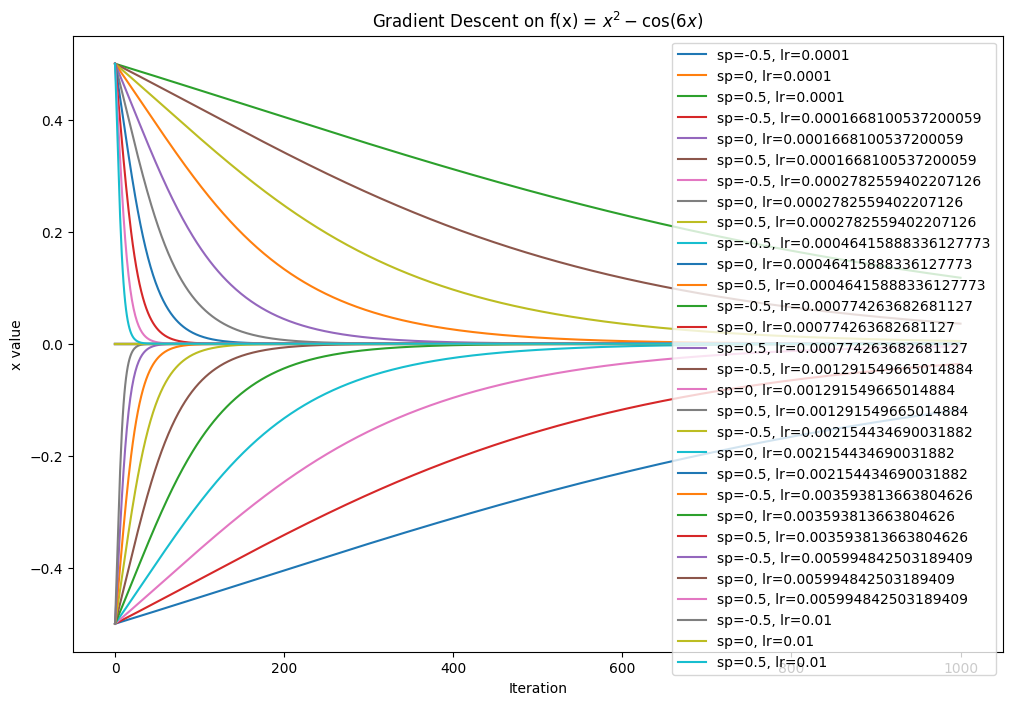

In [ ]:

# Define the non-convex function
def f_nonconvex(x):
    return x**2 - np.cos(10*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_points = [-0.5, 0, 0.5]  # Different initial points to capture different behaviors
learning_rates = np.logspace(-4, -2, num=10)  # Logarithmically spaced learning rates from 0.001 to 1
num_iterations = 1000  # Increased number of iterations for better observation

# Test the gradient descent on f(x) = x^2 - cos(6x)
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f_nonconvex, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(6x)$')
plt.legend()
plt.show()

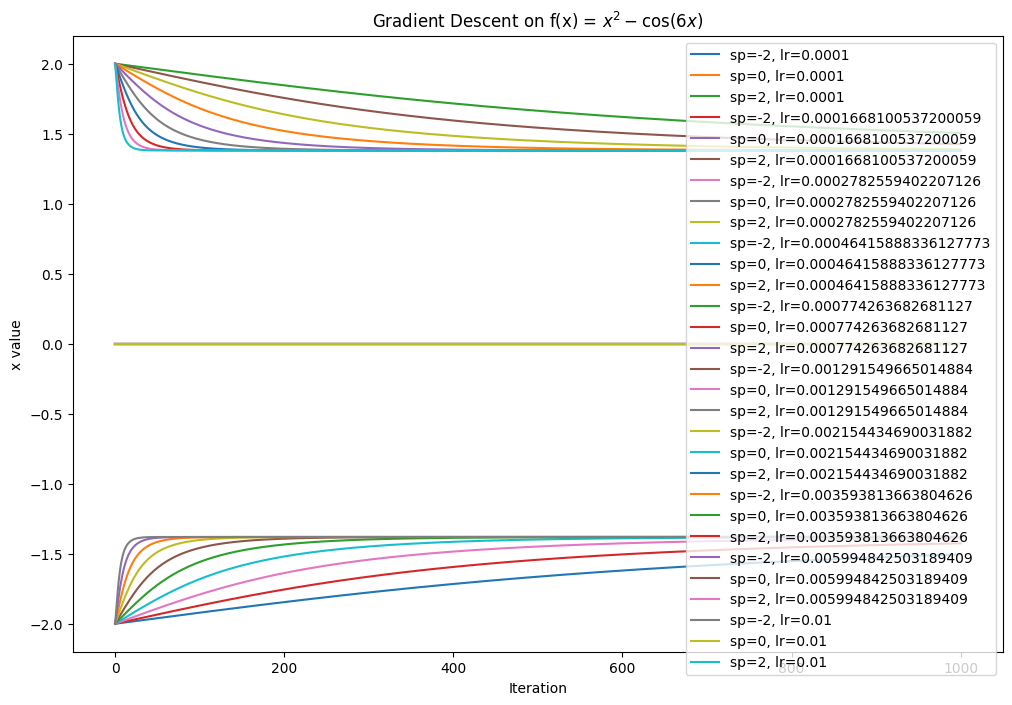

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define the non-convex function
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement the gradient descent algorithm
def gradient_descent(grad, start_point, learning_rate, num_iterations):
    x = start_point
    x_history = [x]
    for i in range(num_iterations):
        x -= learning_rate * grad(x)
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_points = [-2, 0, 2]  # Different initial points to capture different behaviors
learning_rates = np.logspace(-4, -2, num=10)  # Logarithmically spaced learning rates from 0.001 to 1
num_iterations = 1000  # Increased number of iterations for better observation

# Test the gradient descent on f(x) = x^2 - cos(6x)
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    for sp in start_points:
        x_history = gradient_descent(grad_f_nonconvex, sp, lr, num_iterations)
        plt.plot(x_history, label=f'sp={sp}, lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(6x)$')
plt.legend()
plt.show()

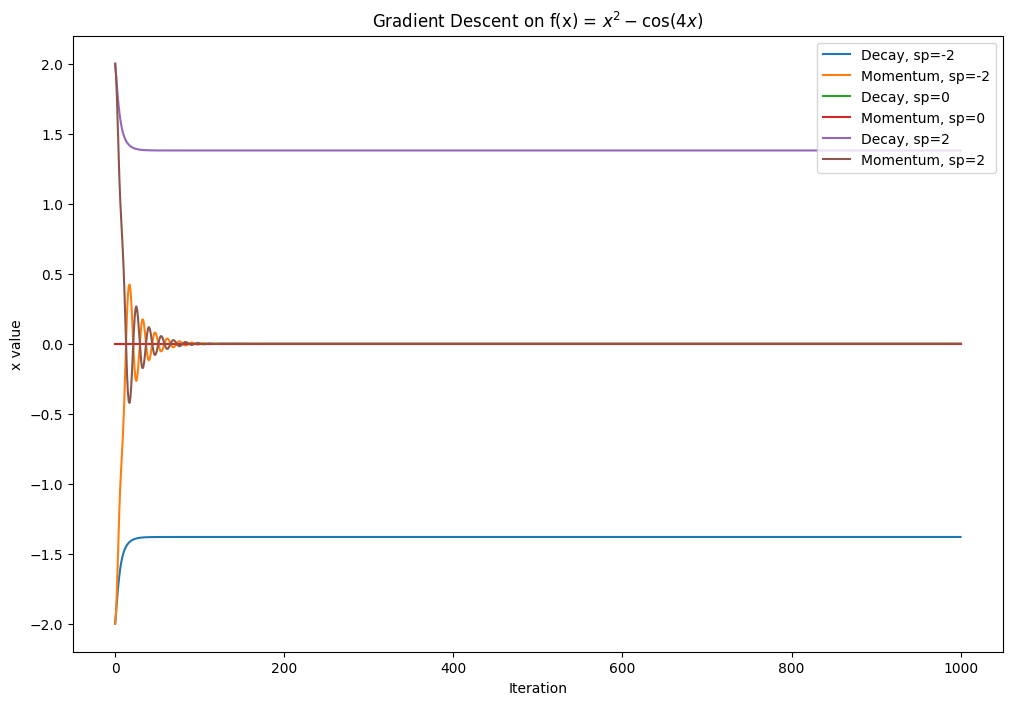

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the non-convex function
def f_nonconvex(x):
    return x**2 - np.cos(4*x)

# Define the gradient of the non-convex function
def grad_f_nonconvex(x):
    return 2*x + 4*np.sin(4*x)

# Implement gradient descent with learning rate decay
def gradient_descent_with_decay(grad, start_point, initial_lr, num_iterations, decay_rate):
    x = start_point
    x_history = [x]
    lr = initial_lr
    for i in range(num_iterations):
        x -= lr * grad(x)
        x_history.append(x)
        if (i + 1) % 100 == 0:  # Decay the learning rate every 100 iterations
            lr *= decay_rate
    return x_history

# Implement gradient descent with momentum
def gradient_descent_with_momentum(grad, start_point, learning_rate, num_iterations, momentum=0.9):
    x = start_point
    x_history = [x]
    velocity = 0  # Initialize velocity
    for i in range(num_iterations):
        grad_x = grad(x)
        velocity = momentum * velocity - learning_rate * grad_x  # Update velocity
        x += velocity  # Update position
        x_history.append(x)
    return x_history

# Parameters for the gradient descent
start_points = [-2, 0, 2]  # Different initial points to explore different behaviors
num_iterations = 1000  # Number of iterations for better observation
initial_lr = 0.01  # Initial learning rate
decay_rate = 0.95  # Decay rate for learning rate decay

# Plot the results
plt.figure(figsize=(12, 8))
for sp in start_points:
    # Gradient descent with learning rate decay
    x_history_decay = gradient_descent_with_decay(grad_f_nonconvex, sp, initial_lr, num_iterations, decay_rate)
    plt.plot(x_history_decay, label=f'Decay, sp={sp}')
    
    # Gradient descent with momentum
    x_history_momentum = gradient_descent_with_momentum(grad_f_nonconvex, sp, initial_lr, num_iterations)
    plt.plot(x_history_momentum, label=f'Momentum, sp={sp}')

plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Gradient Descent on f(x) = $x^2 - \cos(4x)$')
plt.legend()
plt.show()